In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\chunweil\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
# Import Data
import pandas as pd
df_dc= pd.read_csv("C:/Users/chunweil/Cleaned_DCWater.csv")
Important_feature=["Year",'BinomBreak','FrzIndex','DIAMTR','AGE15','FrostAct','Pop','Road','MATRL_CI','LANDUSE_Transport']
dc_water=df_dc.loc[:,Important_feature]
dc_water.head(6)

,Year,BinomBreak,FrzIndex,DIAMTR,AGE15,FrostAct,Pop,Road,MATRL_CI,LANDUSE_Transport
0,1,0,73,20.0,81,3,434,0,1,0
1,1,0,73,16.0,66,2,7,0,1,0
2,1,0,73,16.0,66,2,7,0,1,0
3,1,0,73,16.0,35,0,0,0,0,0
4,1,0,73,16.0,35,0,0,0,0,0
5,1,0,73,24.0,69,0,223,0,0,0


In [28]:
test_ML=dc_water.loc[dc_water["Year"]>=50,:]
print(test_ML.describe())


               Year    BinomBreak      FrzIndex        DIAMTR         AGE15  \
count  37317.000000  37317.000000  37317.000000  37317.000000  37317.000000   
mean      53.000000      0.004984     59.285714     24.973082     69.063965   
std        2.000027      0.070425     13.853646     10.783084     35.086444   
min       50.000000      0.000000     30.000000     16.000000      0.000000   
25%       51.000000      0.000000     56.000000     16.000000     49.000000   
50%       53.000000      0.000000     58.000000     20.000000     68.000000   
75%       55.000000      0.000000     72.000000     30.000000     90.000000   
max       56.000000      1.000000     75.000000     84.000000    156.000000   

           FrostAct           Pop          Road      MATRL_CI  \
count  37317.000000  37317.000000  37317.000000  37317.000000   
mean       1.139561    211.563121      1.081035      0.619208   
std        1.216899    387.450183      1.427369      0.485588   
min        0.000000      0.0

37131
186


count    186.000000
mean      78.086022
std       34.346928
min        0.000000
25%       64.000000
50%       74.000000
75%       94.750000
max      155.000000
Name: AGE15, dtype: float64

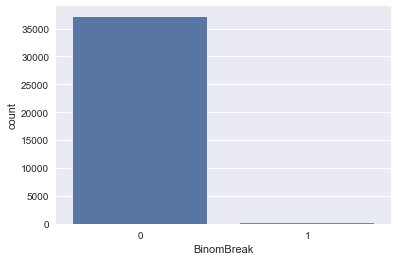

In [29]:
# count the number of instances in "Non-Break" and " Break" class respectively
from collections import Counter
non_break=Counter(test_ML["BinomBreak"])[0]
break1=Counter(test_ML["BinomBreak"])[1]
print(non_break)
print(break1)
break1/non_break
sns.countplot(test_ML["BinomBreak"])

# check the average of AGE15 by "BinomBreak"
test_ML.AGE15[dc_water.BinomBreak==1].describe()

In [32]:
# create the dataset for building model (only select preditors with numerical values)
df_test= test_ML.reindex(columns=["BinomBreak",'FrzIndex','DIAMTR','AGE15','FrostAct','Pop','Road','MATRL_CI','LANDUSE_Transport'])
df_test.info()

df_test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37317 entries, 261219 to 298535
Data columns (total 9 columns):
BinomBreak           37317 non-null int64
FrzIndex             37317 non-null int64
DIAMTR               37317 non-null float64
AGE15                37317 non-null int64
FrostAct             37317 non-null int64
Pop                  37317 non-null int64
Road                 37317 non-null int64
MATRL_CI             37317 non-null int64
LANDUSE_Transport    37317 non-null int64
dtypes: float64(1), int64(8)
memory usage: 3.8 MB


BinomBreak           0
FrzIndex             0
DIAMTR               0
AGE15                0
FrostAct             0
Pop                  0
Road                 0
MATRL_CI             0
LANDUSE_Transport    0
dtype: int64

In [31]:
# feature selection 
Important_feature=['FrzIndex','DIAMTR','AGE15','FrostAct','Pop','Road','MATRL_CI','LANDUSE_Transport']
pre_var=["BinomBreak"]


In [69]:
# Create a function for machine learning algorithmns  
# return: precision
def Classification_model_precision(model,Data,x,y):
# here x is the variable which are used for prediction(test) and y is the prediction variable 
    train,test = train_test_split(test_ML,test_size=0.33,random_state=7)
    train_x = Data.ix[train.index,x] # Data for training only with features
    train_y = Data.ix[train.index,y] # Data for training only with predcition variable
    test_x = Data.ix[test.index,x] # same as for training 
    test_y = Data.ix[test.index,y]
    scaler=StandardScaler() # feature scaling 
    scaler.fit(train_x)
    x_train=scaler.transform(train_x)
    x_test=scaler.transform(test_x)

    model.fit(x_train,train_y.values.ravel())
    pred=model.predict(x_test)
    #pred_prob=model.predict_proba(x_test)
    #accuracy=accuracy_score(test_y,pred)
    #CM=confusion_matrix(test_y,pred)
    #roc_score=roc_score(test_y,pred)
    #CR=classification_report(test_y,pred)
    pr=precision_score(test_y,pred)
    return pr

In [40]:
# make a list of machine learning models 
models=["RandomForestClassifier","Gaussian Naive Bays","KNN","Logistic_Regression","Support_Vector"]
Classification_models =[RandomForestClassifier(n_estimators=100),GB(),knn(n_neighbors=5),LogisticRegression(),SVC()]
Pred_var=["BinomBreak"]


In [109]:
# Evaluate performance of original ML models 
Precision=[]
for model in Classification_models:
    pr=Classification_model_precision(model,df_test,Important_feature,pre_var)
    Precision.append(pr)

In [110]:
# Create a table for comparing the accuracy rate amoung multiple algorithmns
Precision_with_important_features = pd.DataFrame(
    { "Classification Model" :models,
     "Precision with important features":Precision
     
    })
    
Precision_with_important_features.sort_values(by="Precision with important features",ascending=False).reset_index(drop=True)

,Classification Model,Precision with important features
0,RandomForestClassifier,0.066667
1,Gaussian Naive Bays,0.000000
2,KNN,0.000000
3,Logistic_Regression,0.000000
4,Support_Vector,0.000000


In [70]:
# Create a function for machine learning algorithmns  
# return: accuracy
def Classification_model_accuracy(model,Data,x,y):
# here x is the variable which are used for prediction(test) and y is the prediction variable 
    
    train,test = train_test_split(test_ML,test_size=0.33,random_state=7)
    train_x = Data.ix[train.index,x] # Data for training only with features
    train_y = Data.ix[train.index,y] # Data for training only with predcition variable
    test_x = Data.ix[test.index,x] # same as for training 
    test_y = Data.ix[test.index,y]
    scaler=StandardScaler() # feature scaling 
    scaler.fit(train_x)
    x_train=scaler.transform(train_x)
    x_test=scaler.transform(test_x)

    model.fit(x_train,train_y.values.ravel())
    pred=model.predict(x_test)
    #pred_prob=model.predict_proba(x_test)
    accuracy=accuracy_score(test_y,pred)
    #CM=confusion_matrix(test_y,pred)
    #roc_score=roc_score(test_y,pred)
    #CR=classification_report(test_y,pred)
    #pr=precision_score(test_y,pred)
    return accuracy

In [74]:
# Evaluate performance of original ML models 
Accuracy=[]
for model in Classification_models:
    accuracy=Classification_model(model,df_test,Important_feature,pre_var)
    Accuracy.append(accuracy)

In [75]:
Accuracy_with_important_features = pd.DataFrame(
    { "Classification Model" :models,
     "Accuracy with important features":Accuracy
     
    })
    
Accuracy_with_important_features.sort_values(by="Accuracy with important features",ascending=False).reset_index(drop=True)

,Accuracy with important features,Classification Model
0,0.994478,KNN
1,0.994478,Logistic_Regression
2,0.994478,Support_Vector
3,0.993504,RandomForestClassifier
4,0.988145,Gaussian Naive Bays


In [67]:
# Machine Learning with Parameters Tuning  
from sklearn.model_selection import GridSearchCV
def Classification_model_GridSearch(model,Data,x,y,params):
    data_x = Data.ix[:,x]  
    data_y = Data.ix[:,y] 
    data_y=data_y.values.ravel()
    clf = GridSearchCV(model,params,scoring= 'precision',cv=5)
    clf.fit(data_x,data_y)
    print("best score is :")
    print(clf.best_score_)
    print('')
    print("best estimator is :")
    print(clf.best_estimator_)

    return (clf.best_score_)
    

In [68]:
models=["RandomForestClassifier","Gaussian Naive Bays","KNN","Logistic_Regression","Support_Vector"]
Model_Accuracy=[]


In [76]:
# Comparison between raw model and parameters tuning models
# Random forest
seed=7
num_tree=30
model = RandomForestClassifier()
pr_rm_raw=Classification_model_precision(RandomForestClassifier(n_estimators=100, random_state=seed),df_test,Important_feature,pre_var)

print(pr_rm_raw)

0.0769230769231


In [77]:
model = RandomForestClassifier(random_state=seed)
Model_Precision=[]
param_grid = {'n_estimators':(70,80,90,100),'criterion':('gini','entropy'),'max_depth':[25,30]}
Precision=Classification_model_GridSearch(model,df_test,Important_feature,pre_var,param_grid)
Model_Precision.append(Precision)

best score is :
0.0277827528864

best estimator is :
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=90, n_jobs=1, oob_score=False, random_state=7,
            verbose=0, warm_start=False)


In [92]:
# After tunning the parameter in random forest, the precision rate increase from 0.07923 to 0.08333

pr_rm_tu=Classification_model_precision(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=90, n_jobs=1, oob_score=False, random_state=7,
            verbose=0, warm_start=False),df_test,Important_feature,pre_var)
cr_rm_tu=Classification_model_Report(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=90, n_jobs=1, oob_score=False, random_state=7,
            verbose=0, warm_start=False),df_test,Important_feature,pre_var)
print(pr_rm_tu)
print(cr_rm_tu)

0.0833333333333
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     12247
          1       0.08      0.01      0.03        68

avg / total       0.99      0.99      0.99     12315



In [84]:
# Boosting
# Gradiant Boosting Decision Tree
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
seed=7
num_tree=30
kfold=model_selection.KFold(n_splits=10, random_state=seed)
model_Boosing=GradientBoostingClassifier(n_estimators=num_tree,random_state=seed)
pr_bd=Classification_model_precision(model_Boosing,df_test,Important_feature,pre_var)
cm_bd=Classification_model_CM(model_Boosing,df_test,Important_feature,pre_var)
cr_bd=Classification_model_Report(model_Boosing,df_test,Important_feature,pre_var)
print(pr_bd)
print(cm_bd)
print(cr_bd)

0.5
[[12246     1]
 [   67     1]]
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     12247
          1       0.50      0.01      0.03        68

avg / total       0.99      0.99      0.99     12315



In [83]:
# Create a function for machine learning algorithmns  
# return: Cofusion Matrix
def Classification_model_CM(model,Data,x,y):
# here x is the variable which are used for prediction(test) and y is the prediction variable 
    
    train,test = train_test_split(test_ML,test_size=0.33,random_state=7)
    train_x = Data.ix[train.index,x] # Data for training only with features
    train_y = Data.ix[train.index,y] # Data for training only with predcition variable
    test_x = Data.ix[test.index,x] # same as for training 
    test_y = Data.ix[test.index,y]
    scaler=StandardScaler() # feature scaling 
    scaler.fit(train_x)
    x_train=scaler.transform(train_x)
    x_test=scaler.transform(test_x)

    model.fit(x_train,train_y.values.ravel())
    pred=model.predict(x_test)
    #pred_prob=model.predict_proba(x_test)
    accuracy=accuracy_score(test_y,pred)
    CM=confusion_matrix(test_y,pred)
    #roc_score=roc_score(test_y,pred)
    #CR=classification_report(test_y,pred)
    #pr=precision_score(test_y,pred)
    return CM

def Classification_model_Report(model,Data,x,y):
# here x is the variable which are used for prediction(test) and y is the prediction variable 
    
    train,test = train_test_split(test_ML,test_size=0.33,random_state=7)
    train_x = Data.ix[train.index,x] # Data for training only with features
    train_y = Data.ix[train.index,y] # Data for training only with predcition variable
    test_x = Data.ix[test.index,x] # same as for training 
    test_y = Data.ix[test.index,y]
    scaler=StandardScaler() # feature scaling 
    scaler.fit(train_x)
    x_train=scaler.transform(train_x)
    x_test=scaler.transform(test_x)

    model.fit(x_train,train_y.values.ravel())
    pred=model.predict(x_test)
    #pred_prob=model.predict_proba(x_test)
    #accuracy=accuracy_score(test_y,pred)
    #CM=confusion_matrix(test_y,pred)
    #roc_score=roc_score(test_y,pred)
    CR=classification_report(test_y,pred)
    #pr=precision_score(test_y,pred)
    return CR

In [88]:
# AdaBoosting with Decsion Tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() 
cr_ada= Classification_model_Report(AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=1),df_test,Important_feature,pre_var)
print(cr_ada)

             precision    recall  f1-score   support

          0       0.99      1.00      1.00     12247
          1       0.08      0.03      0.04        68

avg / total       0.99      0.99      0.99     12315



In [90]:
# GB
model = GB()
param_grid={}
Accuracy=Classification_model_GridSearch(model,df_test,Important_feature,pre_var,param_grid)
Model_Accuracy.append(Accuracy)

best score is :
0.0

best estimator is :
GaussianNB(priors=None)


In [93]:
#KNN
model=knn()
model_precision_knn=[]
param_grid={'n_neighbors':[5,15],'weights':('uniform','distance'),'p':[1,5]}
PR_KNN=Classification_model_GridSearch(model,df_test,Important_feature,pre_var,param_grid)
model_precision_knn.append(PR_KNN)

best score is :
0.0363961220681

best estimator is :
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='distance')


In [114]:
#KNN with parameter tuning-->fail
cm_knn_tu=Classification_model_Report(knn(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='distance'),df_test,Important_feature,pre_var)
pr_knn_tu=Classification_model_precision(knn(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='distance'),df_test,Important_feature,pre_var)
print(cm_knn_tu)
print(pr_knn_tu)




             precision    recall  f1-score   support

          0       0.99      1.00      1.00     12247
          1       0.05      0.01      0.02        68

avg / total       0.99      0.99      0.99     12315

0.05


In [128]:
# Model Comparision
# Create new dataframe for new model
new_model=["Random Forest with Tuning",
           "Gradient Boosting Decsion Tree",
           "AdaBoosting",
           "KNN with Tuning"
          ]
new_number=[0.08333,0.5,0.08,0.05]

In [136]:
new.head(4)

,Classification Model,Precision with important features
0,Random Forest with Tuning,0.08333
1,Gradient Boosting Decsion Tree,0.50000
2,AdaBoosting,0.08000
3,KNN with Tuning,0.05000


In [141]:
old=Precision_with_important_features.drop(Precision_with_important_features.index[[5,6,7,8]])

In [142]:
# Combine old and new datasets
Final=old.append(new)

In [143]:
Final.head(7)

,Classification Model,Precision with important features
0,RandomForestClassifier,0.066667
1,Gaussian Naive Bays,0.000000
2,KNN,0.000000
3,Logistic_Regression,0.000000
4,Support_Vector,0.000000
0,Random Forest with Tuning,0.083330
1,Gradient Boosting Decsion Tree,0.500000


In [144]:
Final.sort_values(by="Precision with important features",ascending=False)

,Classification Model,Precision with important features
1,Gradient Boosting Decsion Tree,0.500000
0,Random Forest with Tuning,0.083330
2,AdaBoosting,0.080000
0,RandomForestClassifier,0.066667
3,KNN with Tuning,0.050000
1,Gaussian Naive Bays,0.000000
2,KNN,0.000000
3,Logistic_Regression,0.000000
4,Support_Vector,0.000000
